![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

We are taking housing data from King's County, Washington. This data has approximately 20 thousand entries, with each row representing a home sale. The entires include the sale price of each home, as well as other features, such as Sqaure fottage of living area, overall condition, zipcode etc. 

## Business Problem

We have been hired by a developer to find out what factors indicate that a home will sell for a large amount. They want to build single family homes like the ones in our dataset and need to know which attributes to focus on. The variables most associated with home price are those that are the most important for the developer to invest in. 


### Importing relevant libraries, as well as our data 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from util import run_model 
from util import evaluate_model

pd.set_option('display.max_columns',None)
data = pd.read_csv('kc_house_data.csv')

### Taking an initial look at our dataframe

In [2]:
#data.info()

In [3]:

data['price'] = data['price'].map(lambda x: np.log(x))
data.price


0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 21597, dtype: float64

### Seperating our data into train and test groups 

In [4]:
y = data['price']
X = data.drop('price', axis=1)

# Split the data out, specifying size of the split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=5)

#Join the dataframes back together 
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

### Looking at the correlations of price vs each column 

In [5]:
#sns.pairplot(data_train)
#plt.show()
#fig, ax = plt.subplots(figsize=(18,10))
#sns.heatmap(data_train.corr(), annot=True, ax=ax)
#data_train.corr().price.sort_values(ascending=False)

### One-Hot Encoding the waterfront column

In [6]:
def waterfront_cleanup(df, column_name):
    df['on_the_water'] = df[column_name]
    df.loc[ df['on_the_water'] != 1, ['on_the_water']] = 0
    df.loc[ df['on_the_water'] != 0, ['on_the_water']] = 1

waterfront_cleanup(data_train, 'waterfront')
data_train.on_the_water.value_counts()


0.0    17153
1.0      124
Name: on_the_water, dtype: int64

### Grouping our data by zipcode, and sorting by average house price

In [7]:
def zipcode_sorter(df):
    return df.groupby('zipcode')['price'].mean().round().sort_values(ascending=False)

#zipcode_sorter(data_train)

### One-Hot encoding zipcodes

In [8]:
pd.set_option('display.max_columns', None)
#from sklearn.preprocessing import OneHotEncoder

#def zipcode_encoder(df):
    #zipcodes = df[['zipcode']]
    #ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
   # ohe.fit(zipcodes)
    #encoded_zipcodes = ohe.transform(zipcodes)
    #zipcodes = list(ohe.categories_[0])
   # encoded_zipcodes_df = pd.DataFrame(encoded_zipcodes, 
                                       #columns=ohe.get_feature_names(['zipcode']),
                                       #index = df.index)
    #return encoded_zipcodes_df

    
#data_train =  pd.concat([data_train, zipcode_encoder(data_train)], axis=1)
#data_test =  pd.concat([data_test, zipcode_encoder(data_test)], axis=1)

zipcodes = []
def zipcode_encoder(df):
    for i in list(set(df['zipcode'])):
        data_train.loc[data_train['zipcode'] == i, 'zip_' + str(i)] = 1
        data_train.loc[data_train['zipcode'] != i, 'zip_' + str(i)] = 0
        
        data_test.loc[data_test['zipcode'] == i, 'zip_' + str(i)] = 1
        data_test.loc[data_test['zipcode'] != i, 'zip_' + str(i)] = 0
        
        zipcodes.append('zip_' + str(i))

zipcode_encoder(data_test)

        
data_test.head()
#print(zipcodes)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zip_98177,zip_98178,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98188,zip_98065,zip_98070,zip_98198,zip_98072,zip_98199,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98039,zip_98125,zip_98126,zip_98040,zip_98001,zip_98002,zip_98003,zip_98004,zip_98133,zip_98006,zip_98005,zip_98136,zip_98008,zip_98010,zip_98011,zip_98007,zip_98014,zip_98144,zip_98146,zip_98019,zip_98148,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98155,zip_98030,zip_98031,zip_98029,zip_98033,zip_98034,zip_98032,zip_98166,zip_98038,zip_98168,zip_98042,zip_98045
15393,104560280,5/22/2014,4,3.00,1990,6180,2.0,NaN,0.0,3,7,1990,0.0,1990,0.0,98023,47.3083,-122.360,1910,6180,12.517227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6035,1725059316,11/20/2014,4,4.00,6330,13296,2.0,0.0,2.0,3,13,4900,1430.0,2000,0.0,98033,47.6488,-122.201,2200,9196,14.686804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12871,3861470120,11/26/2014,4,2.75,4270,25807,2.0,0.0,0.0,3,11,4270,0.0,1996,0.0,98004,47.5951,-122.206,3860,20723,14.291745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21099,7853361310,12/15/2014,4,2.50,1950,5000,2.0,0.0,0.0,3,8,1950,0.0,2012,0.0,98065,47.5150,-121.872,2710,5000,12.959844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11629,3834000004,3/2/2015,2,1.50,1150,7552,1.0,0.0,1.0,3,7,1150,0.0,1944,0.0,98125,47.7298,-122.286,1910,8145,12.765688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One-Hot Encoding Neighborhoods

In [9]:
zipcode_dict = {98002: 'Auburn',98092: 'Auburn',98224: 'Baring',98004: 'Bellevue',98005: 'Bellevue',
98006: 'Bellevue',98007: 'Bellevue',98008: 'Bellevue',98010: 'Black_Diamond',98011: 'Bothell',
98178: 'Bryn_Mawr_Skyway',98148: 'Burien',98166: 'Burien',98014: 'Carnation',98077: 'Cottage_Lake',
98042: 'Covington',98198: 'Des_Moines',98019: 'Duvall',98031: 'East_Hill_Meridian',98022: 'Enumclaw',
98058: 'Fairwood',98024: 'Fall_City',98003: 'Federal_Way',98023: 'Federal_Way',98027: 'Issaquah',
98029: 'Issaquah',98028: 'Kenmore',98032: 'Kent',98030: 'Kent',98033: 'Kirkland',98034: 'Kirkland',
98001: 'Lakeland_North',98038: 'Maple_Valley',98039: 'Medina',98040: 'Mercer_Island',98045: 'North_Bend',
98047: 'Pacific',98050: 'Preston',98051: 'Ravensdale',98052: 'Redmond',98055: 'Renton',98056: 'Renton',
98057: 'Renton',98059: 'Renton',98074: 'Sammamish',98075: 'Sammamish',98188: 'SeaTac',98199: 'Seattle',
98174: 'Seattle',98154: 'Seattle',98158: 'Seattle',98164: 'Seattle',98101: 'Seattle',98102: 'Seattle',
98103: 'Seattle',98104: 'Seattle',98105: 'Seattle',98106: 'Seattle',98107: 'Seattle',98108: 'Seattle',
98109: 'Seattle',98112: 'Seattle',98115: 'Seattle',98116: 'Seattle',98117: 'Seattle',98118: 'Seattle',
98119: 'Seattle',98121: 'Seattle',98122: 'Seattle',98125: 'Seattle',98126: 'Seattle',98133: 'Seattle',
98134: 'Seattle',98136: 'Seattle',98144: 'Seattle',98155: 'Shoreline',98177: 'Shoreline',98288: 'Skykomish',
98065: 'Snoqualmie',98168: 'Tukwila',98053: 'Union_Hill_Novelty_Hill',98195: 'Univ_Of_Washington',
98070: 'Vashon',98146: 'White_Center',98072: 'Woodinville'}



for i in zipcode_dict.keys():
    data_train.loc[data_train['zipcode'] == i, 'neighborhood'] = zipcode_dict[i] 
    data_test.loc[data_test['zipcode'] == i, 'neighborhood'] = zipcode_dict[i] 

neighborhood_list = list(set(data_train['neighborhood']))

for i in neighborhood_list:
    data_train.loc[data_train['neighborhood'] == i, i] = 1
    data_train.loc[data_train['neighborhood'] != i, i] = 0

for i in neighborhood_list:
    data_test.loc[data_test['neighborhood'] == i, i] = 1
    data_test.loc[data_test['neighborhood'] != i, i] = 0

data_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,on_the_water,zip_98177,zip_98178,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98188,zip_98065,zip_98070,zip_98198,zip_98072,zip_98199,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98039,zip_98125,zip_98126,zip_98040,zip_98001,zip_98002,zip_98003,zip_98004,zip_98133,zip_98006,zip_98005,zip_98136,zip_98008,zip_98010,zip_98011,zip_98007,zip_98014,zip_98144,zip_98146,zip_98019,zip_98148,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98155,zip_98030,zip_98031,zip_98029,zip_98033,zip_98034,zip_98032,zip_98166,zip_98038,zip_98168,zip_98042,zip_98045,neighborhood,Union_Hill_Novelty_Hill,Kirkland,Cottage_Lake,Bothell,Federal_Way,Vashon,Maple_Valley,Black_Diamond,Lakeland_North,Covington,Seattle,Tukwila,Woodinville,Auburn,Medina,North_Bend,Snoqualmie,Fairwood,Bryn_Mawr_Skyway,East_Hill_Meridian,Duvall,Sammamish,Carnation,White_Center,Bellevue,Enumclaw,Kent,Kenmore,SeaTac,Renton,Issaquah,Shoreline,Mercer_Island,Fall_City,Burien,Redmond,Des_Moines
2744,2472920140,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433,12.911642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fairwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,6021500025,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063,13.356249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seattle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13314,7852130720,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018,13.022543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Snoqualmie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8085,1924059029,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454,15.356670,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mercer_Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10303,4154304740,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,13.471611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seattle,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

### Simple Model 

Our simple model is just square footage of living space plotted against price, as that was the variable with the strongest correlation to price. 

In [10]:
simple_formula = 'price ~ sqft_living'
simple_model = ols(formula=simple_formula, data=data_train).fit()
results= simple_model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.601e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:53:28   Log-Likelihood:                -7742.8
No. Observations:               17277   AIC:                         1.549e+04
Df Residuals:                   17275   BIC:                         1.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2214      0.007   1710.590      0.000      12.207      12.235
sqft_living     0.0004   3.15e-06    126.514      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.638   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.622
Skew:                           0.030   Prob(JB):                        0.269
Kurtosis:                       3.009   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Defining functions to create model formulas with zipcodes and neighborhoods

In [11]:
neighborhoods = list(set(zipcode_dict.values()))

def zipcode_formula_builder(df, lst):
    zipcodes = list(set(df['zipcode']))
    zipcode_formula = 'price ~ '
    for i in zipcodes:
        zipcode_formula += '{} + '.format(str(i))
    for i in lst:
        zipcode_formula += '{} + '.format(str(i))
    zipcode_formula = zipcode_formula[:-2]
    return zipcode_formula

def zipcode_column_builder(df, lst):
    columns = lst
    for i in zipcodes:
        columns.append(str(i))
    return columns

def neighborhood_column_builder(df, lst):
    columns = lst
    for i in neighborhoods:
        columns.append(str(i))
    return columns


def neighborhood_formula_builder(df, lst):
    neighborhoods = list(set(df['neighborhood']))
    neighborhood_formula = 'price ~ '
    for i in neighborhoods:
        neighborhood_formula += '{} + '.format(str(i))
    for i in lst:
        neighborhood_formula += '{} + '.format(str(i))
    neighborhood_formula = neighborhood_formula[:-2]
    return neighborhood_formula

#print(zipcode_formula_builder(data_train, ['sqft_living', 'grade']))
#print()
#print(neighborhood_formula_builder(data_train, ['sqft_living', 'grade']))
print(zipcode_column_builder(data_train, ['sqft_living', 'grade', 'condition']))
print()
print(neighborhood_column_builder(data_train, ['sqft_living', 'grade']).pop(-1))

['sqft_living', 'grade', 'condition', 'zip_98177', 'zip_98178', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98188', 'zip_98065', 'zip_98070', 'zip_98198', 'zip_98072', 'zip_98199', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98039', 'zip_98125', 'zip_98126', 'zip_98040', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98133', 'zip_98006', 'zip_98005', 'zip_98136', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98007', 'zip_98014', 'zip_98144', 'zip_98146', 'zip_98019', 'zip_98148', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98155', 'zip_98030', 'zip_98031', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98032', 'zip_98166', 'zip_98038', 'zip_98168', 'zip_98042', 'zip_98045']

Des_Moines


### Generating a model using just zipcodes

['zip_98177', 'zip_98178', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98188', 'zip_98065', 'zip_98070', 'zip_98198', 'zip_98072', 'zip_98199', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98039', 'zip_98125', 'zip_98126', 'zip_98040', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98133', 'zip_98006', 'zip_98005', 'zip_98136', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98007', 'zip_98014', 'zip_98144', 'zip_98146', 'zip_98019', 'zip_98148', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98155', 'zip_98030', 'zip_98031', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98032', 'zip_98166', 'zip_98038', 'zip_98168', 'zip_98042', 'zip_98045']
Train R2: 0.844
Test R2: 0.845
****
Train RMSE: 0
Test RMSE: 0
****
Train MAE: 0
Test MAE

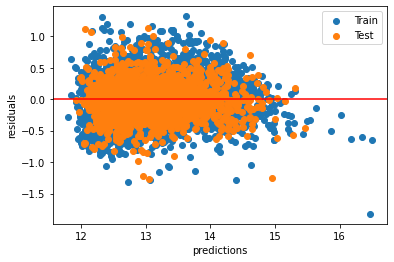



Residual qq plot


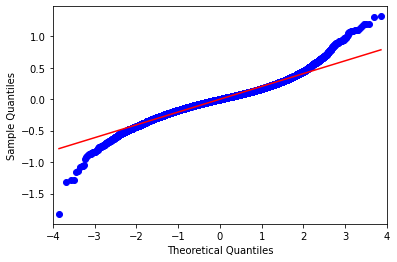

In [12]:
model_columns = zipcode_column_builder(data_test, ['sqft_living', 'grade'])
model = run_model(data_train, data_test, model_columns)
model_summ = model[0].summary()
#model_summ
print(zipcode_column_builder(data_train, []))
evaluate_model(data_train, data_test, model_columns)

Train R2: 0.848
Test R2: 0.848
****
Train RMSE: 0
Test RMSE: 0
****
Train MAE: 0
Test MAE: 0

Residual scatter plot:


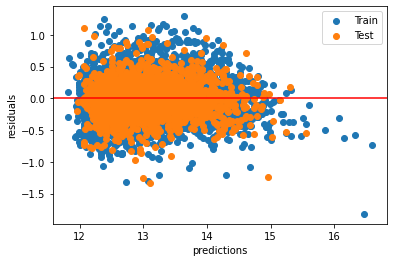



Residual qq plot


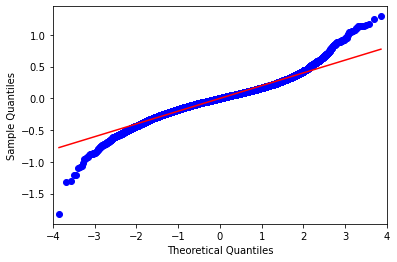

In [13]:
model_columns_1 = zipcode_column_builder(data_test, ['sqft_living', 'yr_built', 'grade'])
model = run_model(data_train, data_test, model_columns_1)
model_summ = model[0].summary()


model_summ
#evaluate_model(data_train, data_test, model_columns_1)

cols = model_columns_1
formula = 'price ~ ' + ' + '.join(cols)
model_2 = ols(formula=formula, data = data_test).fit()
model_2_summ = model_2.summary()
model_2_summ

evaluate_model(data_train, data_test, model_columns_1)

Train R2: 0.848
Test R2: 0.848
****
Train RMSE: 0
Test RMSE: 0
****
Train MAE: 0
Test MAE: 0

Residual scatter plot:


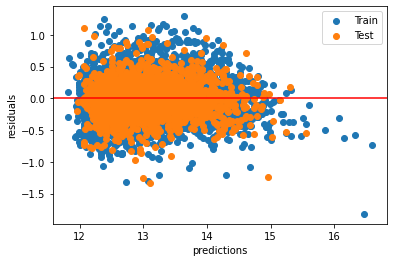



Residual qq plot


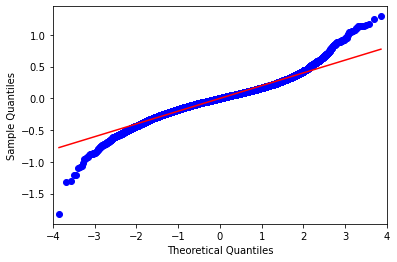

In [14]:
model_columns = zipcode_column_builder(data_test, ['sqft_living', 'grade', 'yr_built'])
model = run_model(data_train, data_test, model_columns)
model_summ = model[0].summary()
model_summ
evaluate_model(data_train, data_test, model_columns)

Train R2: 0.780
Test R2: 0.778
****
Train RMSE: 0
Test RMSE: 0
****
Train MAE: 0
Test MAE: 0

Residual scatter plot:


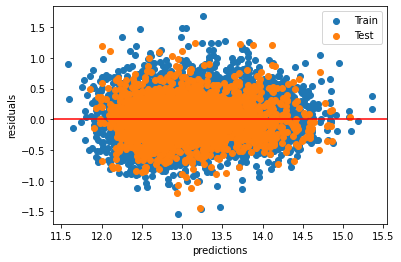



Residual qq plot


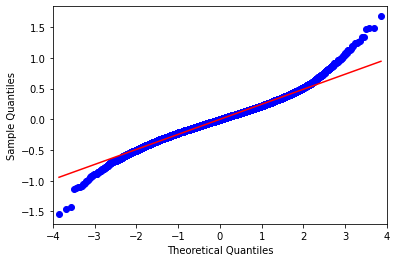

In [15]:
model_columns = zipcode_column_builder(data_test, [ 'grade', 'yr_built'])
model = run_model(data_train, data_test, model_columns)
model_summ = model[0].summary()

evaluate_model(data_train, data_test, model_columns)